# Task 05 – Exploratory Data Analysis (EDA)
## Titanic Dataset

### Objective
The objective of this task is to perform exploratory data analysis on the Titanic
dataset to identify patterns, trends, and relationships that influenced passenger
survival using statistical summaries and visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
df = pd.read_csv("../data/raw/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Overview

This section provides an initial understanding of the dataset structure,
data types, and basic statistical properties.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df["Survived"].value_counts()
df["Sex"].value_counts()
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
df["Survived"].value_counts()
df["Sex"].value_counts()
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

The following sections analyze the dataset using univariate,
bivariate, and multivariate analysis techniques.

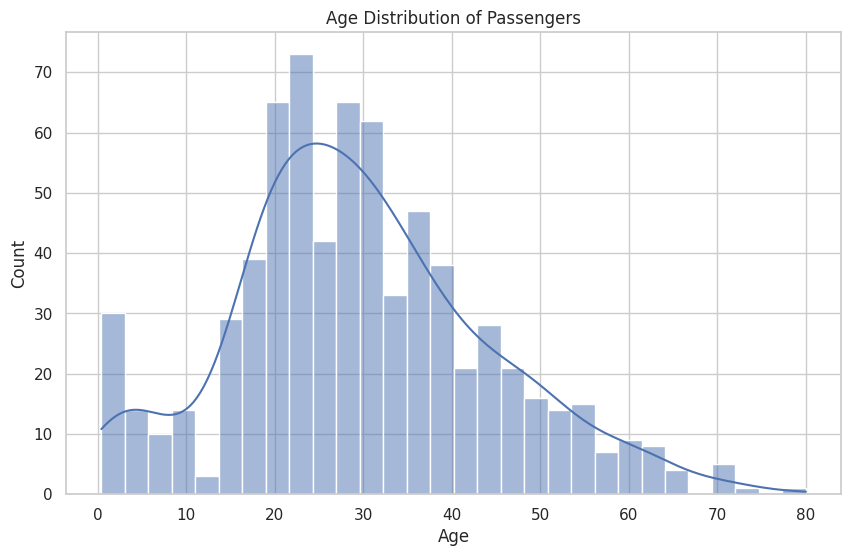

In [8]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")

plt.savefig("../outputs/figures/age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

**Observation:**
- Most passengers were between 20 and 40 years old.
- The age distribution is slightly right-skewed.

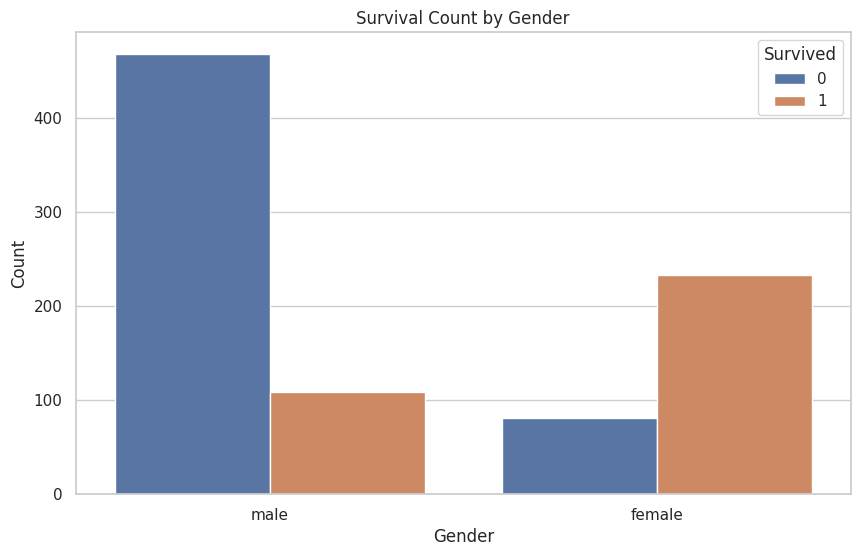

In [9]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.savefig("../outputs/figures/survival_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()

**Observation:**
- Female passengers had a significantly higher survival rate compared to males.

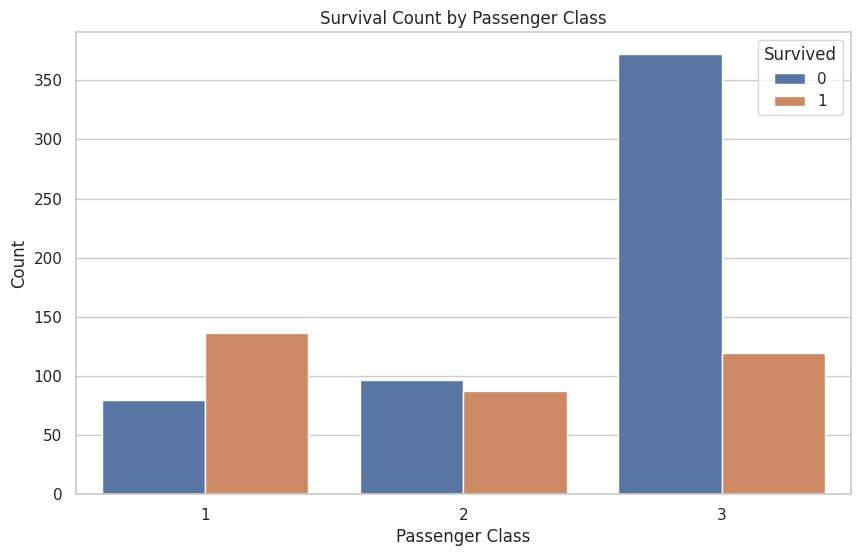

In [10]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")

plt.savefig("../outputs/figures/survival_by_class.png", dpi=300, bbox_inches="tight")
plt.show()

**Observation:**
- First-class passengers had a higher probability of survival.
- Survival rates decreased with lower passenger classes.

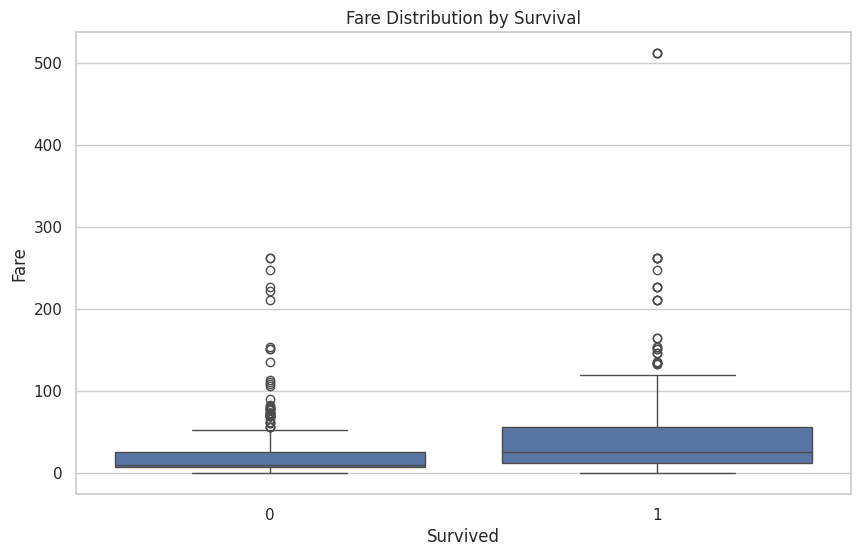

In [11]:
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")

plt.savefig("../outputs/figures/fare_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

**Observation:**
- Passengers who survived generally paid higher fares.

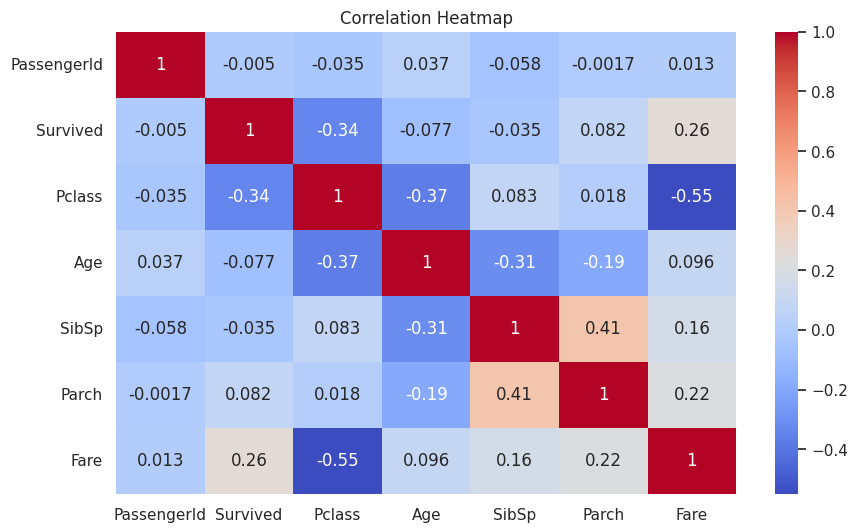

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.savefig("../outputs/figures/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

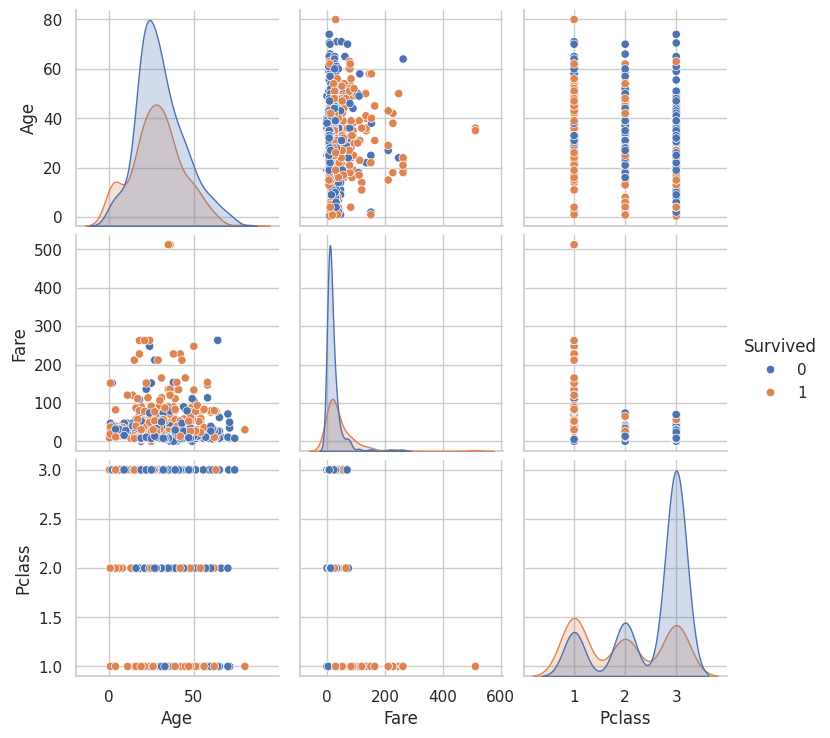

In [13]:
pairplot = sns.pairplot(df[["Survived", "Age", "Fare", "Pclass"]], hue="Survived")
pairplot.savefig("../outputs/figures/pairplot.png", dpi=300)

## Summary of Findings

- Gender and passenger class strongly influenced survival.
- Higher fares were associated with higher survival probability.
- Younger and middle-aged passengers formed the majority of travelers.
- Clear patterns exist that explain survival outcomes on the Titanic.

In [14]:
df.to_csv("../data/processed/titanic_cleaned.csv", index=False)